# Zestaw 6. Układy równań liniowych

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg
from time import time

## 1. Metoda Gaussa-Jordana

<i> Napisz i sprawdź funkcję rozwiązującą układ równań liniowych n × n metodą Gaussa-Jordana. </i> 

In [126]:
def gauss_jordan(A, B):
    n = A.shape[0]
    
    A = A.copy()
    B = B.copy()
    
    for i in range(n):
        p = i
        while p < n and A[p, i] == 0:
            p += 1
            
        if p == n:
            print('no solution')
            return
        
        A[[p, i]] = A[[i, p]]
        B[[p, i]] = B[[p, i]]
        
        for j in range(n):
            if j != i:
                B[j] -= (A[j, i]/A[i, i])* B[i]
                A[j,:] -= (A[j, i]/A[i, i])* A[i,:]
    
    return B/np.diag(A)

In [127]:
A = np.array([[1,1,1], [1,2,3], [4,2,1]], dtype=float)
B = np.array([3, 6, 7], dtype=float)

print(f'implemented function: {gauss_jordan(A, B)}')
print(f'numpy: {np.linalg.solve(A, B)}')

implemented function: [1. 1. 1.]
numpy: [1. 1. 1.]


In [327]:
def test_gauss_jordan(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n)
    
    try:
        np_result = np.linalg.solve(A, B).flatten()
    except:
        print('singular matrix')
        return
        
    jordan_result = gauss_jordan(A, B)
    
    print(f'implemented function: {jordan_result}')
    print(f'numpy: {np_result}')
    print(f'close: {np.allclose(np_result, jordan_result)}\n')

In [328]:
test_gauss_jordan(3)
test_gauss_jordan(10)
test_gauss_jordan(500)

implemented function: [ 0.87354151  0.28152735 -0.18939253]
numpy: [ 0.87354151  0.28152735 -0.18939253]
close: True

implemented function: [ 0.9353496   0.57611807  0.37425718 -0.76001793  2.4753189  -0.75836651
 -0.48837602 -0.09280716 -1.41392549  1.09306087]
numpy: [ 0.9353496   0.57611807  0.37425718 -0.76001793  2.4753189  -0.75836651
 -0.48837602 -0.09280716 -1.41392549  1.09306087]
close: True

implemented function: [-2.75714996e+00  3.54530732e+00  3.39917887e-02  3.97297019e-01
 -9.84206551e-01  3.62746712e-02  1.34941900e+00 -2.05345583e+00
 -8.27120828e-01  9.27719624e-01 -1.09342309e-01 -8.47693933e-01
  3.07593381e+00 -4.76228758e-01  7.80333101e-01  2.57228499e+00
 -7.79989216e-01 -8.25253979e-01  2.63726620e-01  3.39879525e+00
  2.03861579e+00 -1.64474627e+00  1.46656572e+00 -3.80249136e-01
 -2.18763429e+00  1.68781123e+00 -2.95383169e-01 -1.26390416e+00
  3.29260778e+00 -1.90971752e+00  2.21214698e-01  2.73721762e-02
 -2.06362179e+00  1.04377968e+00 -1.19309614e+00  2.

<i>Dla rozmiarów macierzy współczynników większych niż 500 × 500 porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych. Opisz wyniki i podaj zalety i wady w stosunku do metody eliminacji Gaussa.
</i>

In [329]:
def compare_times_gauss_jordan(n_min, n_max, step):
    
    np_times = []
    jordan_times = []
    ns = []
    
    for n in range(n_min, n_max+1, step):
        A = np.random.rand(n, n)
        B = np.random.rand(n)
        
        start = time()
        try:
            np_result = np.linalg.solve(A, B).flatten()
        except:
            continue
        end = time()
        np_times.append(end-start)

        start = time()
        jordan_result = gauss_jordan(A, B)
        end = time()
        jordan_times.append(end-start)
        ns.append(n)
    
    fig, ax = plt.subplots()
    ax.plot(ns, np_times, label='numpy', color='darksalmon', marker='o', linewidth=2)
    ax.plot(ns, jordan_times, label='gauss-jordan', color='skyblue', marker='o', linewidth=2)
    
    ax.legend()
    
    for n, numpy, jordan in zip(ns, np_times, jordan_times):
        print(f'n: {n}, numpy: {numpy}, gauss-jordan: {jordan}')
    plt.show()

n: 500, numpy: 0.07705807685852051, gauss-jordan: 0.9096856117248535
n: 600, numpy: 0.005233049392700195, gauss-jordan: 1.4032175540924072
n: 700, numpy: 0.005710601806640625, gauss-jordan: 1.9383797645568848
n: 800, numpy: 0.012654781341552734, gauss-jordan: 2.6319901943206787
n: 900, numpy: 0.009873151779174805, gauss-jordan: 3.4461519718170166
n: 1000, numpy: 0.011397838592529297, gauss-jordan: 4.384941101074219


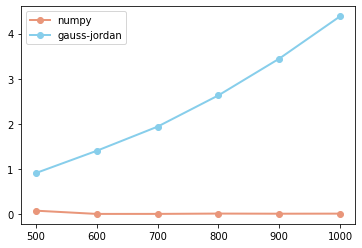

In [330]:
compare_times_gauss_jordan(500, 1000, 100)

#### wyniki
(...)
#### wady-zalety
(...)

## 2. Faktoryzacja LU

<i>1. Zaimplementuj i sprawdź funkcję dokonującą faktoryzacji A = LU macierzy A. Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie. Sprawdź wyniki.</i>

In [501]:
def lu_factorization(A):
    n = A.shape[0]
    A = A.copy()
    U = A.copy()
    L = np.zeros((n, n))
    
    scales = [max(A[i,:], key=lambda x: abs(x)) for i in range(n)]
    #scales = [1 for i in range(n)]
    
    for i in range(n):
        max_a = 0
        p = -1
        
        for row in range(i, n):
            if abs(U[row, i]) > max_a:
                max_a = abs(U[row, i])/scales[row]
                p = row
                
        if p == -1:
            return
        
        A[[p, i]] = A[[i, p]]
        U[[p, i]] = U[[i, p]]
        L[[p, i]] = L[[i, p]]
        L[i, i] = 1
        
        for j in range(i+1, n):
            a = U[j, i]
            U[j,:] -= (U[j, i]/U[i, i])* U[i, :]
            L[j, i] = a/U[i, i]
    
    return L, U, A

In [502]:
A_ = np.array([[1,1,1], [1,2,3], [4,2,1]], dtype=float)
L, U, A = lu_factorization(A_)
print("L: ", L)
print("U: ", U)
print("A: ", A)
print("correct? ", np.allclose(L@U, A))
scipy.linalg.lu(A_)

L:  [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.25       0.33333333 1.        ]]
U:  [[ 4.          2.          1.        ]
 [ 0.          1.5         2.75      ]
 [ 0.          0.         -0.16666667]]
A:  [[4. 2. 1.]
 [1. 2. 3.]
 [1. 1. 1.]]
correct?  True


(array([[0., 0., 1.],
        [0., 1., 0.],
        [1., 0., 0.]]),
 array([[1.        , 0.        , 0.        ],
        [0.25      , 1.        , 0.        ],
        [0.25      , 0.33333333, 1.        ]]),
 array([[ 4.        ,  2.        ,  1.        ],
        [ 0.        ,  1.5       ,  2.75      ],
        [ 0.        ,  0.        , -0.16666667]]))

<i>2. Opisz w jaki sposób faktoryzacja LU może być wykorzystana do rozwiązywania układów równań liniowych i zaimplementuj rozwiązanie. Porównaj wyniki z funkcją biblioteczną.</i>

Ly = B, Ux = y, złożoność spada do O(n^2)
...

In [503]:
def lu_solve(A, B):
    print(np.linalg.solve(A, B))
    n = A.shape[0]
    M = np.hstack((A, B.reshape(-1,1)))
    L, U, M = lu_factorization(M)
    U = U[:, :-1]
    A, B = M[:, :-1], M[:, -1]
    print(L@U)
    print(A)
    
    y = np.zeros(n)
    for i in range(n):
        y[i] = (B[i] - np.sum(L[i, :i]*y[:i]))/L[i, i]
    
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (y[i] - np.sum(U[i, i+1:]*x[i+1:]))/U[i, i]
    
    print(np.linalg.solve(A, B))
    return x

In [504]:
A = np.array([[1,1,1], [1,2,3], [4,2,1]], dtype=float)
B = np.array([3, 6, 7], dtype=float)
lu_solve(A, B)

[1. 1. 1.]
[[4. 2. 1.]
 [1. 1. 1.]
 [1. 2. 3.]]
[[4. 2. 1.]
 [1. 1. 1.]
 [1. 2. 3.]]
[1. 1. 1.]


array([1., 1., 1.])

In [505]:
def test_lu_solve(n):
    A = np.random.rand(n, n)
    B = np.random.rand(n)
    
    try:
        np_result = np.linalg.solve(A, B).flatten()
    except:
        print('singular matrix')
        return
        
    lu_result = lu_solve(A, B)
    
    print(f'implemented function: {lu_result}')
    print(f'numpy: {np_result}')
    print(f'close: {np.allclose(np_result, lu_result)}\n')

In [506]:
test_lu_solve(3)
test_lu_solve(10)
test_lu_solve(500)

[ 1.27057877 -1.34279817  0.68718561]
[[9.26624165e-01 8.56044044e-01 9.57068524e-04]
 [6.57886935e-01 9.36844348e-01 9.91443288e-01]
 [2.18650155e-01 8.41557597e-02 9.47267463e-01]]
[[9.26624165e-01 8.56044044e-01 9.57068524e-04]
 [6.57886935e-01 9.36844348e-01 9.91443288e-01]
 [2.18650155e-01 8.41557597e-02 9.47267463e-01]]
[ 1.27057877 -1.34279817  0.68718561]
implemented function: [ 1.27057877 -1.34279817  0.68718561]
numpy: [ 1.27057877 -1.34279817  0.68718561]
close: True

[-0.39731601  0.58593555 -0.58389282 -0.43008472  0.51197088 -0.11591477
  0.82995817  0.35541172 -0.71695411  0.63494019]
[[9.73219208e-01 9.07309860e-01 7.30473021e-01 8.33540078e-01
  5.16030288e-01 8.24172946e-01 8.62566227e-01 9.90184953e-01
  5.18519412e-01 1.31284802e-01]
 [7.76614855e-01 1.56335551e-01 1.96902889e-01 3.86284035e-01
  8.16810259e-01 5.22464795e-01 6.89853619e-01 8.17615201e-01
  5.02670923e-01 4.90557549e-01]
 [1.84525106e-01 7.38770719e-01 3.27352808e-02 7.18752666e-01
  8.92757264e-01 

[[0.99546816 0.13374876 0.84127475 ... 0.05699454 0.98768757 0.07894358]
 [0.10201223 0.9967923  0.56434756 ... 0.07534656 0.14108466 0.19465191]
 [0.98718911 0.99223423 0.02645381 ... 0.95681993 0.2133107  0.17509226]
 ...
 [0.72941136 0.1135431  0.20843279 ... 0.67271179 0.88187549 0.5632377 ]
 [0.93421642 0.96715002 0.45941011 ... 0.01794764 0.65283203 0.00166561]
 [0.78429148 0.3651961  0.76536622 ... 0.54910355 0.60062836 0.18727986]]
[[0.99546816 0.13374876 0.84127475 ... 0.05699454 0.98768757 0.07894358]
 [0.10201223 0.9967923  0.56434756 ... 0.07534656 0.14108466 0.19465191]
 [0.98718911 0.99223423 0.02645381 ... 0.95681993 0.2133107  0.17509226]
 ...
 [0.72941136 0.1135431  0.20843279 ... 0.67271179 0.88187549 0.5632377 ]
 [0.93421642 0.96715002 0.45941011 ... 0.01794764 0.65283203 0.00166561]
 [0.78429148 0.3651961  0.76536622 ... 0.54910355 0.60062836 0.18727986]]
[ 2.39567748e+00  1.70991647e+00  1.26353770e+00  3.03546105e+00
 -3.56402413e+00 -2.32536134e-01 -1.35936751e+0

## 3. Przekształcenie sfery w elipsoidę

1. Korzystając z równania parametrycznego narysuj sferę jednostkową w 3D $v = [\cos(s)\sin(t), \sin(s)\sin(t), \cos(t)],  s \in [0, 2\pi], t \in [0, \pi]$

In [532]:
def get_sphere_points(n):
    ss = np.linspace(0, 2*np.pi, n)
    ts = np.linspace(0, np.pi, n)
    
    x = lambda s, t: np.cos(s)*np.sin(t)
    y = lambda s, t: np.sin(s)*np.sin(t)
    z = lambda s, t: np.cos(t)
    
    return np.array([[x(s, t), y(s, t), z(s,t)] for s in ss for t in ts])

def plot_sphere_points(points):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c=points[:,0], cmap=plt.get_cmap('twilight'))
    plt.show()

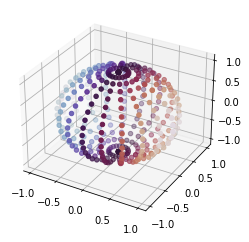

In [534]:
points = get_sphere_points(20)
plot_sphere_points(points)

2. Wygeneruj 3 różne macierze A1, A2, A3, (Ai ∈ R^3×3 ), za ich pomocą dokonaj przekształcenia sfery w elipsoidę, a następnie przedstaw wizualizację uzyskanego wyniku.

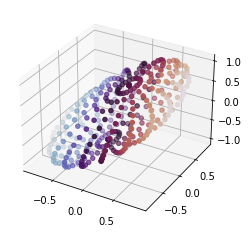

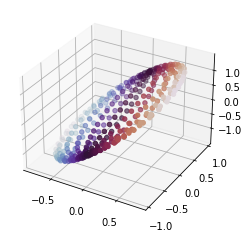

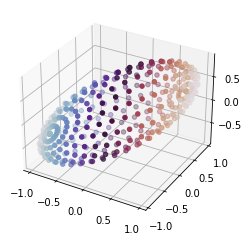

In [569]:
n = 20
A1 = np.random.rand(3, 3)
A2 = np.random.rand(3, 3)
A3 = np.random.rand(3, 3)

points = get_sphere_points(n)
plot_sphere_points(points@A1)
plot_sphere_points(points@A2)
plot_sphere_points(points@A3)

3. Dokonaj rozkładu według wartości osobliwych (SVD) każdej macierzy Ai. Na wykresie elipsoidy odpowiadającej przekształceniu A i dodaj wizualizację jej półosi wyznaczonych za pomocą SVD.

(array([[-0.71868947,  0.61129994, -0.33135755],
       [-0.54857279, -0.79130371, -0.27001172],
       [-0.42726261, -0.01228085,  0.90404416]]), array([1.36781511, 0.71001903, 0.4235162 ]), array([[-0.49853422, -0.50427414, -0.7051037 ],
       [-0.7425529 ,  0.66812327,  0.0471856 ],
       [-0.44730171, -0.54710043,  0.70753254]]))


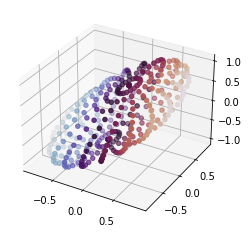

In [581]:
# svd - z funkcji bibliotecznej
def plot_with_axis(points, A):
    svd = np.linalg.svd(A1)
    print(svd)
    points = points @ A
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(points[:,0], points[:,1], points[:,2], c=points[:,0], cmap=plt.get_cmap('twilight'))

plot_with_axis(points, A1)

4. Znajdź taką macierz A i , aby stosunek jej największej i najmniejszej wartości osobliwej był większy od 100. Narysuj odpowiadającą jej elipsoidę. Czym charakteryzuje się wygenerowana elipsoida i czemu tak się dzieje?

In [68]:
# losowa -> svd -> modyfikujemy sigma, 
# żeby coś tam było największe i mnożymy z powrotem

5. Dla wybranej macierzy A i przedstaw wizualizacje SV i T , SΣ i V i T oraz SU i Σ i V i T,gdzie A i = U i Σ i V i T , a S oznacza sferę z punktu 1. Opisz jakie przekształcenia mają miejsce w kolejnych krokach.

## 4. Układ źle uwarunkowany

In [75]:
# poczytać kincaida - strona 321

1. Rozwiąż układ równań
> 0.835x + 0.667y = 0.168
> 0.333x + 0.266y = 0.067

In [587]:
gauss_jordan(np.array([[0.835, 0.667], [0.333, 0.266]]), np.array([0.168, 0.067]))

array([ 1., -1.])

2. Zaburz delikatnie rozwiązanie zmieniając wartość 0.067 na 0.066 i rozwiąż ponownie. Czemu wyniki się znacząco różnią?

In [588]:
gauss_jordan(np.array([[0.835, 0.667], [0.333, 0.266]]), np.array([0.168, 0.066]))

array([-665.99999998,  833.99999998])

3. Używając rozkładu SVD na macierzy współczynników znajdź stosunek maksymalnej do minimalnej wartości osobliwej. Porównaj to z wartościami wygenerowanymi
dla 3 losowych macierzy tego samego rozmiaru i opisz wyniki.

In [77]:
# napisać o co chodzi z kappą

## Wnioski

M. Hawryluk 25.04.2021